In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
path="cropped images/"

batch_size = 32
img_height = 256
img_width = 256

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",batch_size=batch_size,
  seed=123,)



Found 638 files belonging to 11 classes.
Using 511 files for training.


In [6]:
for images, labels in train_ds:
    print(images[1].numpy().astype("uint8"))

[[[224 224 252]
  [224 224 252]
  [225 225 253]
  ...
  [ 47  47  34]
  [ 40  40  28]
  [ 38  38  26]]

 [[224 224 252]
  [224 224 252]
  [225 225 253]
  ...
  [ 46  46  34]
  [ 42  42  30]
  [ 40  40  28]]

 [[225 225 253]
  [225 225 253]
  [226 226 253]
  ...
  [ 46  45  33]
  [ 43  43  31]
  [ 44  44  32]]

 ...

 [[ 23  46  87]
  [ 30  52  93]
  [ 35  56  97]
  ...
  [166 122  84]
  [167 123  84]
  [169 125  86]]

 [[ 19  43  84]
  [ 25  48  89]
  [ 30  52  93]
  ...
  [167 124  85]
  [169 125  86]
  [170 126  87]]

 [[ 14  39  80]
  [ 18  41  83]
  [ 22  45  86]
  ...
  [169 125  87]
  [170 126  87]
  [172 128  89]]]
[[[170 136 127]
  [170 136 127]
  [170 136 127]
  ...
  [172 135 127]
  [172 135 127]
  [172 135 127]]

 [[170 136 127]
  [170 136 127]
  [170 136 127]
  ...
  [172 135 127]
  [172 135 127]
  [172 135 127]]

 [[170 136 127]
  [170 136 127]
  [170 136 127]
  ...
  [172 135 127]
  [172 135 127]
  [172 135 127]]

 ...

 [[143 165 127]
  [144 166 128]
  [145 167 129]
  ..

[[[ 25  15  14]
  [ 29  19  18]
  [ 37  27  26]
  ...
  [104 104 106]
  [104 104 106]
  [104 104 106]]

 [[ 28  18  16]
  [ 30  20  18]
  [ 34  24  22]
  ...
  [104 104 106]
  [104 104 106]
  [104 104 106]]

 [[ 33  23  21]
  [ 31  21  19]
  [ 28  17  15]
  ...
  [104 104 106]
  [104 104 106]
  [104 104 106]]

 ...

 [[ 13   0   0]
  [ 15   3   1]
  [ 19   9   4]
  ...
  [ 85  66  49]
  [ 85  66  49]
  [ 85  66  49]]

 [[ 18   2   0]
  [ 21   6   2]
  [ 24  12   7]
  ...
  [ 85  66  49]
  [ 85  66  49]
  [ 85  66  49]]

 [[ 22   4   0]
  [ 24   7   3]
  [ 27  14   8]
  ...
  [ 85  66  49]
  [ 85  66  49]
  [ 85  66  49]]]


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,batch_size=batch_size,
  subset="validation",
  seed=123)

Found 638 files belonging to 11 classes.
Using 127 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['benzema', 'de_bruyen', 'kane', 'lewandowski', 'mbappe', 'messi', 'neymar', 'ronaldo', 'salah', 'suarez', 'sunil']


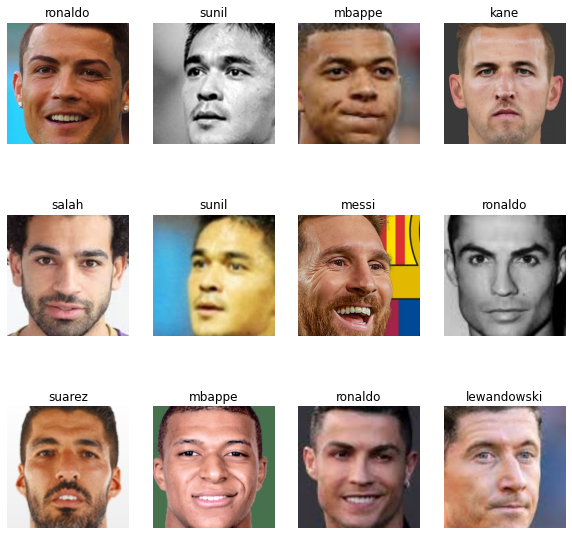

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1 )
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
num_classes = len(class_names)

In [18]:


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)       

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10)

epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,callbacks=callback,
  epochs=epochs
)

Epoch 1/50
26/26 [==============================] - 23s 825ms/step - loss: 2.5100 - accuracy: 0.1037 - val_loss: 2.3340 - val_accuracy: 0.2283
Epoch 2/50
26/26 [==============================] - 21s 807ms/step - loss: 2.1785 - accuracy: 0.2564 - val_loss: 2.0621 - val_accuracy: 0.2677
Epoch 3/50
26/26 [==============================] - 22s 847ms/step - loss: 1.2423 - accuracy: 0.5969 - val_loss: 1.0972 - val_accuracy: 0.6378
Epoch 4/50
26/26 [==============================] - 21s 804ms/step - loss: 0.5616 - accuracy: 0.8258 - val_loss: 1.1233 - val_accuracy: 0.6850
Epoch 5/50
26/26 [==============================] - 21s 806ms/step - loss: 0.3702 - accuracy: 0.8885 - val_loss: 0.7750 - val_accuracy: 0.7638
Epoch 6/50
26/26 [==============================] - 21s 808ms/step - loss: 0.1486 - accuracy: 0.9628 - val_loss: 0.8475 - val_accuracy: 0.7402
Epoch 7/50
26/26 [==============================] - 22s 833ms/step - loss: 0.0371 - accuracy: 0.9922 - val_loss: 0.8149 - val_accuracy: 0.8268

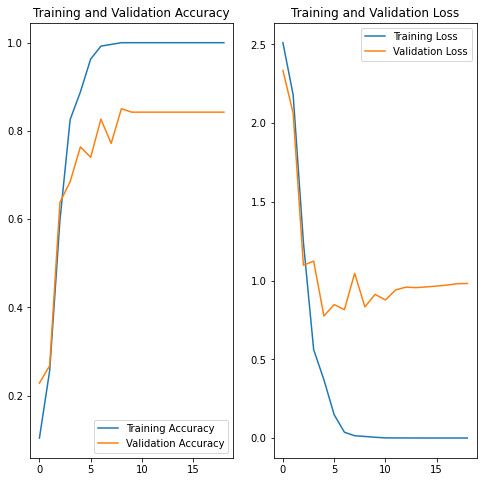

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(19)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

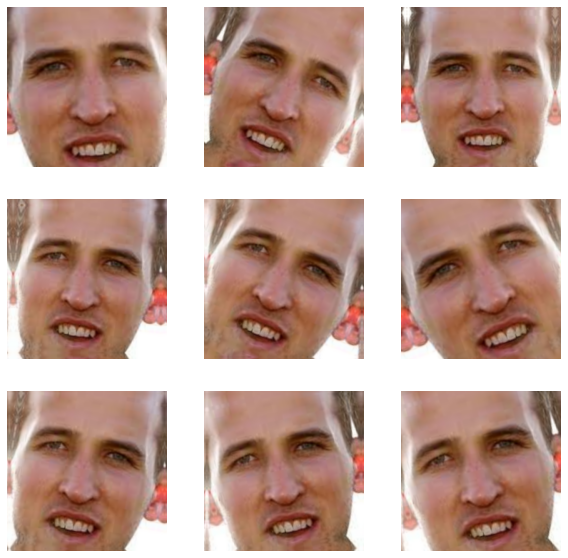

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [13]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [16]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
16/16 [==============================] - 34s 2s/step - loss: 2.5663 - accuracy: 0.1272 - val_loss: 2.3955 - val_accuracy: 0.0945
Epoch 2/25
16/16 [==============================] - 25s 2s/step - loss: 2.3744 - accuracy: 0.1370 - val_loss: 2.3526 - val_accuracy: 0.2835
Epoch 3/25
16/16 [==============================] - 26s 2s/step - loss: 2.2897 - accuracy: 0.1937 - val_loss: 2.1991 - val_accuracy: 0.2598
Epoch 4/25
16/16 [==============================] - 25s 2s/step - loss: 2.1586 - accuracy: 0.2466 - val_loss: 2.0397 - val_accuracy: 0.2756
Epoch 5/25
16/16 [==============================] - 27s 2s/step - loss: 2.0012 - accuracy: 0.3053 - val_loss: 1.7635 - val_accuracy: 0.3780
Epoch 6/25
16/16 [==============================] - 26s 2s/step - loss: 1.7504 - accuracy: 0.3973 - val_loss: 1.7656 - val_accuracy: 0.3937
Epoch 7/25
16/16 [==============================] - 29s 2s/step - loss: 1.5609 - accuracy: 0.4618 - val_loss: 1.5746 - val_accuracy: 0.4173
Epoch 8/25
16/16 [==

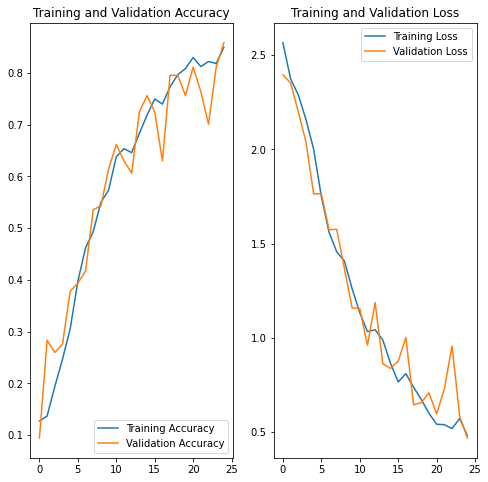

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
path="download (2).jpg"
#cropped_image = get_cropped_image_if_2_eyes(path)
#matplotlib.image.imsave('name.jpg', cropped_image)

#plt.imshow(cv2.imread("name.jpg"))
#path="name.jpg"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))
#os.remove("name.jpg")

This image most likely belongs to lewandowski with a 99.66 percent confidence.


In [25]:
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


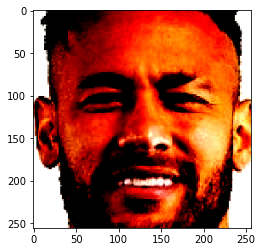

In [27]:
plt.imshow(tf.image.per_image_standardization(
    img
))

In [18]:
from keras.models import load_model
model.save('classify_model.h5')


In [19]:
model_l=load_model('classify_model.h5')

In [1]:
import pickle

In [48]:


pickle.dump(model, open('classify_model.pkl', 'wb'))


INFO:tensorflow:Assets written to: ram://8e0621ec-3ca7-4e3a-8961-45b8bfc1c114/assets


In [2]:
model=pickle.load(open('classify_model.pkl','rb'))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://15347b21-f6a9-4160-8f60-611bfc4c4111/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.